In [134]:
import deepdish as dd
import os
import numpy as np
import pylab as plt

In [161]:
python = '/Users/gravity/opt/anaconda3/envs/gwforge_18Oct24/bin/python'

In [258]:
year_pop = dd.io.load("../param_data_files/test_pop_year.h5")

In [260]:
len(year_pop['redshift'])

112734

In [213]:
test_data_local = dd.io.load('../output_data/1_day_prec_z_10_local_SNR_data.h5')['Optimal_SNR']
test_data_parallel = dd.io.load('../output_data/1_day_prec_z_10_parallel_SNR_data.h5')['Optimal_SNR']
test_data_serial = dd.io.load('../output_data/1_day_prec_z_10_serial_SNR_data.h5')['Optimal_SNR']
data_7_days = dd.io.load('../output_data/7_days_prec_z_10_parallel_SNR_data.h5')['Optimal_SNR']
data_31_days_LHV_Design = dd.io.load('../output_data/31_days_prec_z_10_LHV_Design_PSDs_SNR_data.h5')['Optimal_SNR']
data_31_days_LHV_Aplus = dd.io.load('../output_data/31_days_prec_z_10_LHV_Aplus_PSDs_SNR_data.h5')['Optimal_SNR']
data_31_days_LHV_XG = dd.io.load('../output_data/31_days_prec_z_10_LH_CE_PSD_V_ET_PSD_SNR_data.h5')['Optimal_SNR']

In [253]:
def get_detected_SNRs(data_dict, ifo_threshold=8, network_threshold=10):
    detected = {}
    SNR_keys = [key for key in data_dict.keys() if 'SNR' in key]
    for key in SNR_keys:
        if "network_sq" in key:
            detected[key.split('SNR_')[-1]] = data_dict[data_dict[key] > network_threshold**2]
        elif "network" in key:
            detected[key.split('SNR_')[-1]] = data_dict[data_dict[key] > network_threshold]
        else:
            detected[key.split('SNR_')[-1]] = data_dict[data_dict[key] > ifo_threshold]
    return(detected)

In [252]:
detected_7_days_netw = get_detected_SNRs(data_7_days)['network']
detected_31_days_LHV_design_netw = get_detected_SNRs(data_31_days_LHV_Design)['network']
detected_31_days_LHV_aplus_netw = get_detected_SNRs(data_31_days_LHV_Aplus)['network']
detected_31_days_LHV_xg_netw = get_detected_SNRs(data_31_days_LHV_XG)['network']

In [210]:
detected_7_days_netw.keys()

Index(['inclination', 'distance', 'mass1', 'mass2', 'coa_phase', 'f_ref',
       'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z',
       'approximant', 'f_lower', 'delta_f', 'f_final', 'dec', 'trigger_time',
       'polarization', 'ra', 'SNR_L1', 'SNR_H1', 'SNR_V1', 'SNR_network_sq',
       'SNR_network', 'spin1_a', 'spin2_a', 'chi_eff', 'chi_p', 'mchirp',
       'srcmchirp', 'cos_spin1_polar', 'cos_spin2_polar', 'srcmass1',
       'srcmass2', 'q', 'spin1_azimuthal', 'spin2_azimuthal', 'redshift',
       'eta', 'spin1_polar', 'spin2_polar', 'mtotal', 'srcmtotal',
       'chi_1_in_plane', 'chi_2_in_plane', 'phi_12', 'phi_jl', 'theta_jn',
       'time_interval'],
      dtype='object')

Text(0, 0.5, '$z$')

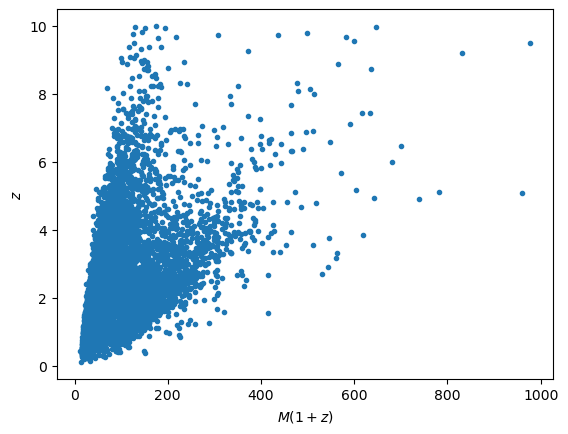

In [235]:
plt.scatter(detected_31_days_LHV_xg_netw['mtotal'], detected_31_days_LHV_xg_netw['redshift'], marker='.')
plt.xlabel('$M(1+z)$')
plt.ylabel('$z$')

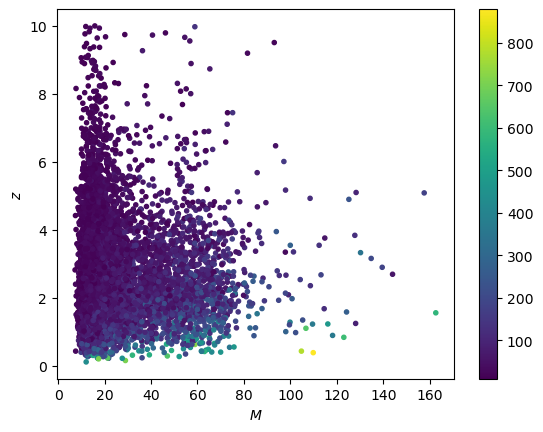

In [250]:
plt.scatter(detected_31_days_LHV_xg_netw['srcmtotal'], 
            detected_31_days_LHV_xg_netw['redshift'], 
            c=detected_31_days_LHV_xg_netw['SNR_network'], marker='.')
plt.xlabel('$M$')
plt.ylabel('$z$')
plt.colorbar()

In [263]:
detected_31_days_LHV_xg_netw.keys()

Index(['inclination', 'distance', 'mass1', 'mass2', 'coa_phase', 'f_ref',
       'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z',
       'approximant', 'f_lower', 'delta_f', 'f_final', 'dec', 'trigger_time',
       'polarization', 'ra', 'SNR_L1', 'SNR_H1', 'SNR_V1', 'SNR_network_sq',
       'SNR_network', 'spin1_a', 'spin2_a', 'chi_eff', 'chi_p', 'mchirp',
       'srcmchirp', 'cos_spin1_polar', 'cos_spin2_polar', 'srcmass1',
       'srcmass2', 'q', 'spin1_azimuthal', 'spin2_azimuthal', 'redshift',
       'eta', 'spin1_polar', 'spin2_polar', 'mtotal', 'srcmtotal',
       'chi_1_in_plane', 'chi_2_in_plane', 'phi_12', 'phi_jl', 'theta_jn',
       'time_interval'],
      dtype='object')

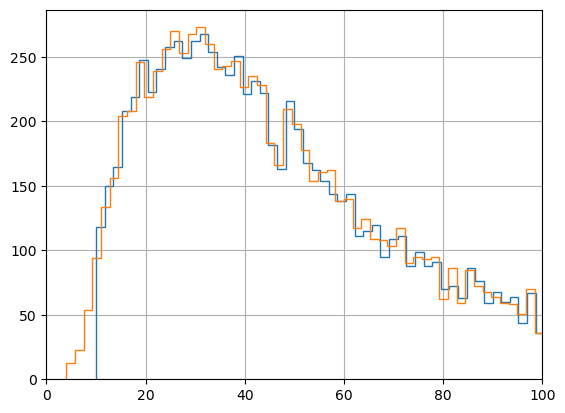

In [281]:
plt.hist(detected_31_days_LHV_xg_netw['SNR_network'], bins=500, histtype=u'step');
plt.hist(data_31_days_LHV_XG['SNR_network'], bins=500, histtype=u'step');
#plt.hist(detected_31_days_LHV_xg_netw['SNR_network'], bins=100, histtype=u'step',cumulative=True);
#plt.hist(detected_31_days_LHV_aplus_netw['SNR_network'], bins=10, histtype=u'step');
#plt.hist(detected_31_days_LHV_design_netw['SNR_network'], bins=10, histtype=u'step');
#plt.yscale('log')
plt.xlim(0,100)
plt.grid()

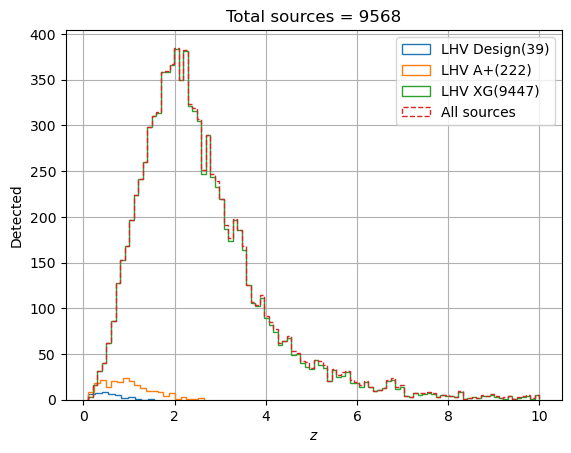

In [257]:
plt.hist(detected_31_days_LHV_design_netw['redshift'], histtype=u'step', 
         label=f'LHV Design({len(detected_31_days_LHV_design_netw)})');
plt.hist(detected_31_days_LHV_aplus_netw['redshift'], histtype=u'step', 
         label=f'LHV A+({len(detected_31_days_LHV_aplus_netw)})', bins=20);
plt.hist(detected_31_days_LHV_xg_netw['redshift'], histtype=u'step', 
         label=f'LHV XG({len(detected_31_days_LHV_xg_netw)})', bins=100);
plt.hist(data_31_days_LHV_XG['redshift'],histtype=u'step', 
         label="All sources", bins=100,ls='--');
plt.legend()
plt.title(f"Total sources = {len(data_31_days_LHV_Aplus['mass1'])}")
plt.ylabel("Detected")
plt.xlabel("$z$")
plt.grid()

Text(0.5, 0, '$z$')

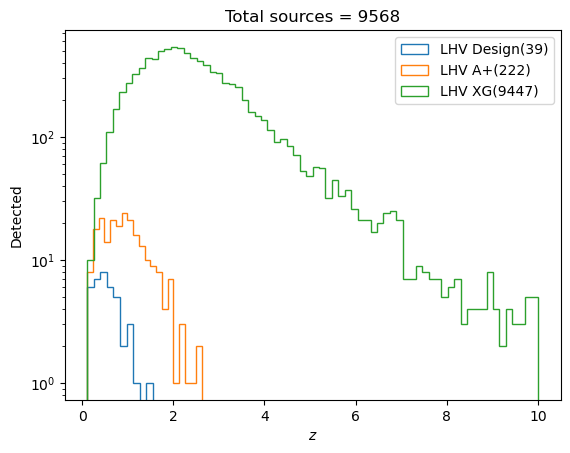

In [241]:
plt.hist(detected_31_days_LHV_design_netw['redshift'], histtype=u'step', 
         label=f'LHV Design({len(detected_31_days_LHV_design_netw)})');
plt.hist(detected_31_days_LHV_aplus_netw['redshift'], histtype=u'step', 
         label=f'LHV A+({len(detected_31_days_LHV_aplus_netw)})', bins=20);
plt.hist(detected_31_days_LHV_xg_netw['redshift'], histtype=u'step', 
         label=f'LHV XG({len(detected_31_days_LHV_xg_netw)})', bins=70);
plt.legend()
plt.title(f"Total sources = {len(data_31_days_LHV_Aplus['mass1'])}")
plt.yscale('log')
plt.ylabel("Detected")
plt.xlabel("$z$")

Text(0.5, 0, '$z$')

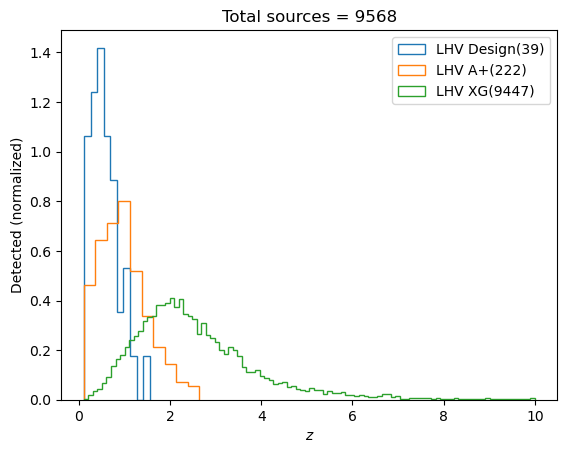

In [244]:
plt.hist(detected_31_days_LHV_design_netw['redshift'], histtype=u'step', 
         label=f'LHV Design({len(detected_31_days_LHV_design_netw)})', density=True);
plt.hist(detected_31_days_LHV_aplus_netw['redshift'], histtype=u'step', 
         label=f'LHV A+({len(detected_31_days_LHV_aplus_netw)})', density=True, bins=10);
plt.hist(detected_31_days_LHV_xg_netw['redshift'], histtype=u'step', 
         label=f'LHV XG({len(detected_31_days_LHV_xg_netw)})', density=True, bins=100);
plt.legend()
plt.title(f"Total sources = {len(data_31_days_LHV_Aplus['mass1'])}")
plt.ylabel("Detected (normalized)")
plt.xlabel("$z$")

In [197]:
test_data_local

,inclination,distance,mass1,mass2,coa_phase,f_ref,spin1x,spin1y,spin1z,spin2x,...,spin1_polar,spin2_polar,mtotal,srcmtotal,chi_1_in_plane,chi_2_in_plane,phi_12,phi_jl,theta_jn,time_interval
0,2.044218,15910.177234,24.067184,20.678905,5.857329,5.0,0.351706,0.607847,0.269369,0.204981,...,1.204531,0.682254,44.746089,14.927865,0.702264,0.326202,4.345612,3.459969,2.014773,107.491375
1,0.814655,86494.483545,120.322944,46.078525,4.599534,5.0,-0.153557,-0.018616,0.084814,-0.002927,...,1.069251,2.700340,166.401469,17.786229,0.154681,0.013543,1.232345,4.734016,0.730994,225.360174
2,0.854060,11658.849526,98.273412,90.179451,0.806561,5.0,-0.390056,0.770851,0.360586,-0.567327,...,1.175393,1.426905,188.452863,73.902314,0.863918,0.949565,2.032822,0.768513,0.978371,58.773768
3,1.824899,21357.994493,26.416732,22.714079,5.415277,5.0,-0.116564,0.070595,0.017128,-0.126201,...,1.445766,1.132805,49.130811,13.858844,0.136274,0.158368,1.193223,5.410218,1.797194,20.119731
4,2.096056,23702.104440,33.869181,15.898584,0.559625,5.0,-0.051949,0.314967,0.153816,-0.147587,...,1.121778,0.643967,49.767766,13.185665,0.319223,0.171012,1.936911,5.513598,2.032772,215.531602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.431555,35060.675516,43.462251,36.899170,2.715863,5.0,0.324374,-0.276009,0.688752,0.020310,...,0.553824,0.185968,80.361421,16.572712,0.425910,0.150194,2.140174,5.490942,0.385496,1096.221048
304,1.672693,40544.897033,53.174884,36.367374,1.223224,5.0,0.647683,-0.583094,0.424733,0.001290,...,1.117308,1.973871,89.542258,16.730440,0.871488,0.009270,5.585014,3.638345,1.575691,3.368692
305,1.807979,19271.132730,149.120227,138.449877,2.393262,5.0,-0.264450,0.057476,0.512947,0.024528,...,0.485473,0.547332,287.570104,86.149836,0.270624,0.300118,4.844586,1.477400,1.893221,1099.120406
306,1.544522,21156.057514,46.462256,37.488529,2.268530,5.0,-0.235932,-0.008022,0.679210,0.025989,...,0.334502,1.148581,83.950785,23.814621,0.236068,0.136300,1.728660,2.677640,1.564752,49.441072


In [198]:
get_detected_SNRs(test_data_local)['network']

,inclination,distance,mass1,mass2,coa_phase,f_ref,spin1x,spin1y,spin1z,spin2x,...,spin1_polar,spin2_polar,mtotal,srcmtotal,chi_1_in_plane,chi_2_in_plane,phi_12,phi_jl,theta_jn,time_interval
34,0.532770,2810.675418,47.076243,29.655835,5.629477,5.0,0.274178,0.838540,-0.230261,-0.238946,...,1.826101,1.205063,76.732078,51.687911,0.882226,0.264198,2.327586,3.439090,0.420346,0.033463
235,1.447689,1803.846948,59.656395,53.806263,1.258496,5.0,-0.024972,0.020333,0.086569,0.293121,...,0.356134,1.509494,113.462658,85.148122,0.032203,0.299962,4.038937,4.726107,1.400394,309.589532


In [171]:
get_detected_SNRs(test_data_serial)['network']

,inclination,distance,mass1,mass2,coa_phase,f_ref,spin1x,spin1y,spin1z,spin2x,...,f_final,dec,trigger_time,polarization,ra,SNR_L1,SNR_H1,SNR_V1,SNR_network_sq,SNR_network
34,0.532770,2810.675418,47.076243,29.655835,5.629477,5.0,0.274178,0.838540,-0.230261,-0.238946,...,1567,-0.698742,1.893034e+09,0.619728,5.490057,6.509596,6.353447,8.570055,156.186961,12.497478
235,1.447689,1803.846948,59.656395,53.806263,1.258496,5.0,-0.024972,0.020333,0.086569,0.293121,...,1567,-0.664756,1.893088e+09,0.007347,3.332223,3.096476,5.307420,10.937706,157.390286,12.545529


In [172]:
get_detected_SNRs(test_data_parallel)['network']

,inclination,distance,mass1,mass2,coa_phase,f_ref,spin1x,spin1y,spin1z,spin2x,...,f_final,dec,trigger_time,polarization,ra,SNR_L1,SNR_H1,SNR_V1,SNR_network_sq,SNR_network
34,0.532770,2810.675418,47.076243,29.655835,5.629477,5.0,0.274178,0.838540,-0.230261,-0.238946,...,1567,-0.698742,1.893034e+09,0.619728,5.490057,6.509596,6.353447,8.570055,156.186961,12.497478
235,1.447689,1803.846948,59.656395,53.806263,1.258496,5.0,-0.024972,0.020333,0.086569,0.293121,...,1567,-0.664756,1.893088e+09,0.007347,3.332223,3.096476,5.307420,10.937706,157.390286,12.545529


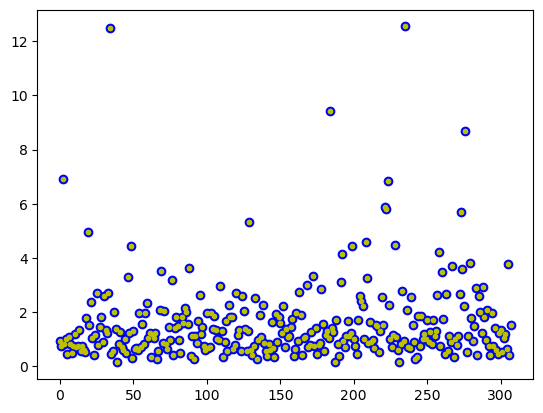

In [173]:
plt.plot(test_data_serial['SNR_network'], 'bo')
plt.plot(test_data_parallel['SNR_network'], 'g.')
plt.plot(test_data_local['SNR_network'], 'y.')